
    # Análise Bibliométrica - 504 Registros
    
    Este notebook realiza uma análise bibliométrica com base em 504 registros. Abaixo estão as principais perguntas de pesquisa (Research Questions - RQs) que serão respondidas:
    
    - **RQ1**: Quais são as literaturas mais influentes?
    - **RQ2**: Quais periódicos são os mais populares no campo?
    - **RQ3**: Quais autores estão liderando os estudos sobre?
    - **RQ4**: Qual é a evolução do campo de pesquisa?
    - **RQ5**: Quais são as principais instituições de pesquisa?
    - **RQ6**: Qual é o status da pesquisa em países/regiões ao redor do mundo?
    - **RQ7**: Quais são as palavras-chave de pesquisa?
    
    Também faremos uma análise comparativa da contribuição dos pesquisadores brasileiros neste campo.
    

In [20]:
pip install pandas openpyxl matplotlib seaborn fuzzywuzzy networkx scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import matplotlib.image as mpimg
import geopandas as gpd
from fuzzywuzzy import process
import networkx as nx
from collections import Counter 
import numpy as np 
from IPython.display import SVG, display

/Users/f.areias/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [87]:
import pandas as pd

translation_dict = {
    "PT": "Publication Type",
    "AU": "Authors",
    "BA": "Book Authors",
    "BE": "Book Editors",
    "GP": "Book Group Authors",
    "AF": "Author Full Names",
    "BF": "Book Author Full Names",
    "CA": "Group Authors",
    "TI": "Article Title",
    "SO": "Source Title",
    "SE": "Book Series Title",
    "BS": "Book Series Subtitle",
    "LA": "Language",
    "DT": "Document Type",
    "CT": "Conference Title",
    "CY": "Conference Date",
    "CL": "Conference Location",
    "SP": "Conference Sponsor",
    "HO": "Conference Host",
    "DE": "Author Keywords",
    "ID": "Keywords Plus",
    "AB": "Abstract",
    "C1": "Addresses",
    "C3": "Affiliations",
    "RP": "Reprint Addresses",
    "EM": "Email Addresses",
    "RI": "Researcher Ids",
    "OI": "ORCIDs",
    "FU": "Funding Orgs",
    "FP": "Funding Name Preferred",
    "FX": "Funding Text",
    "CR": "Cited References",
    "NR": "Cited Reference Count",
    "TC": "Times Cited, WoS Core",
    "Z9": "Times Cited, All Databases",
    "U1": "180 Day Usage Count",
    "U2": "Since 2013 Usage Count",
    "PU": "Publisher",
    "PI": "Publisher City",
    "PA": "Publisher Address",
    "SN": "ISSN",
    "EI": "eISSN",
    "BN": "ISBN",
    "J9": "Journal Abbreviation",
    "JI": "Journal ISO Abbreviation",
    "PD": "Publication Date",
    "PY": "Publication Year",
    "VL": "Volume",
    "IS": "Issue",
    "PN": "Part Number",
    "SU": "Supplement",
    "SI": "Special Issue",
    "MA": "Meeting Abstract",
    "BP": "Start Page",
    "EP": "End Page",
    "AR": "Article Number",
    "DI": "DOI",
    "DL": "DOI Link",
    "D2": "Book DOI",
    "EA": "Early Access Date",
    "PG": "Number of Pages",
    "WC": "WoS Categories",
    "WE": "Web of Science Index",
    "SC": "Research Areas",
    "GA": "IDS Number",
    "PM": "Pubmed Id",
    "OA": "Open Access Designations",
    "HC": "Highly Cited Status",
    "HP": "Hot Paper Status",
    "DA": "Date of Export",
    "UT": "UT (Unique WOS ID)"
}

def process_record(lines):
    record = {}
    for line in lines:
        code = line[:2]  
        if code in translation_dict:
            field_name = translation_dict[code] 
            value = line[3:].strip()
            if code in ["AU", "AF"]: 
                record.setdefault(field_name, []).append(value)
            else:
                record[field_name] = value
    return record

def parse_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        records = []
        current_record = []
        
        for line in file:
            line = line.strip()
            if line.startswith('ER'):
                if current_record:
                    records.append(process_record(current_record))
                    current_record = []
            elif line:
                current_record.append(line)
        
        if current_record:
            records.append(process_record(current_record))
    
    df = pd.DataFrame(records)
    return df

file_path = 'datasets/atividade02/savedrecs (10).txt'
df = parse_file(file_path)

df.head()


,Publication Type,Authors,Author Full Names,Article Title,Source Title,Document Type,Author Keywords,Keywords Plus,Abstract,Addresses,...,Book Group Authors,Research Areas,Book Series Title,Conference Title,Conference Date,Conference Location,Conference Host,Publication Date,Issue,Article Number
0,J,"[Surantha, N]","[Surantha, Nico]",Intelligent Sleep Monitoring System Based on M...,IEEE ACCESS,Article,Monitoring; Sleep; Classification algorithms; ...,STAGES CLASSIFICATION; RESOURCE,Sleep monitoring using polysomnography (PSG) i...,"[Surantha, Nico; Utomo, Oei K.; Lionel, Earlic...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,"[Tovarnitchi, VM]","[Tovarnitchi, Vasile M.]","Designing Distributed, Scalable and Extensible...",2019 22ND INTERNATIONAL CONFERENCE ON CONTROL ...,Proceedings Paper,Actor Model; Reactive Systems; Distributed Sys...,NaN,Digital technologies are reshaping our world a...,"[Tovarnitchi, Vasile M.] Univ Politehn Bucures...",...,IEEE,ENCE (CSCS),International Conference on Control Systems an...,22nd International Conference on Control Syste...,"MAY 28-30, 2019","Univ Politehnica Bucharest, Bucharest, ROMANIA",Univ Politehnica Bucharest,NaN,NaN,NaN
2,J,"[Iovescu, D]","[Iovescu, Daniel]",Real-Time Document Collaboration-System Archit...,APPLIED SCIENCES-BASEL,Article,collaborative work; design document collaborat...,NaN,This article explores the world of dependable ...,"[Iovescu, Daniel; Tudose, Catalin] Natl Univ S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEP,18,8356
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
pd.to_numeric(df['Times Cited, All Databases'], errors='coerce')

0    5.0
1    1.0
2    0.0
3    NaN
Name: Times Cited, All Databases, dtype: float64

In [88]:

def extract_country(address):
    if pd.isna(address):
        return None
    return address.split()[-1]  

df['Countries'] = df['Publisher Address'].apply(extract_country)


## RQ1: Quais são as literaturas mais influentes?

/var/folders/b1/pt4602l50jx0r8v1008yfkc40000gn/T/ipykernel_33679/4053934699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Times Cited, All Databases', y='Article Title', data=literature_data, palette='coolwarm')


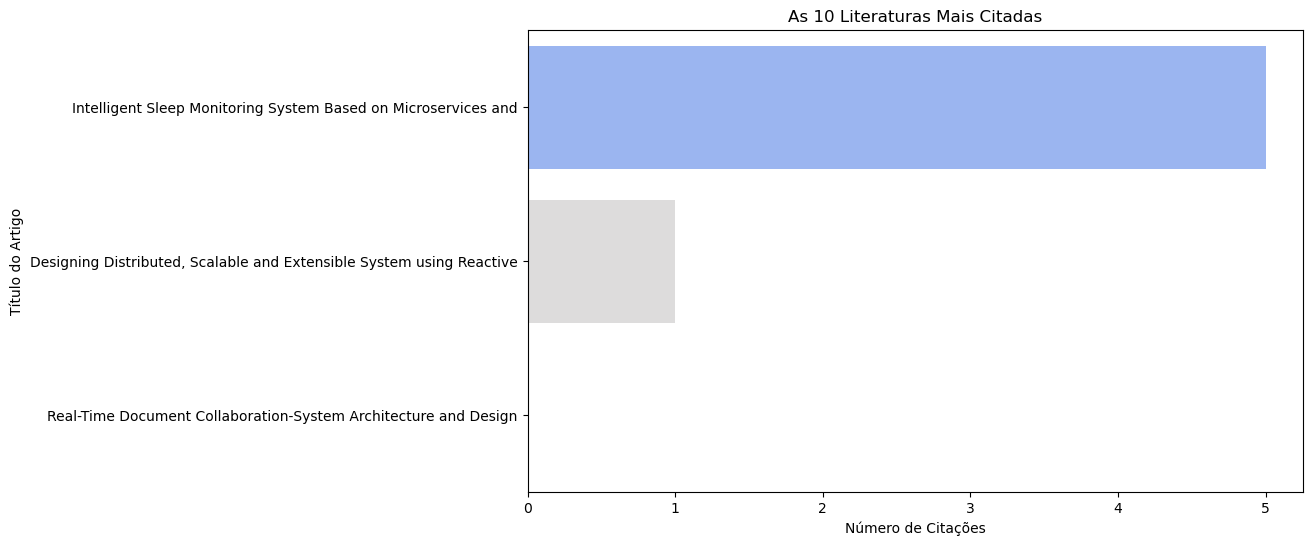

In [85]:

# Gráfico 1: As 10 Literaturas Mais Citadas
df['Times Cited, All Databases'] = pd.to_numeric(df['Times Cited, All Databases'], errors='coerce')
literature_data = df[['Article Title', 'Times Cited, All Databases']].sort_values('Times Cited, All Databases', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Times Cited, All Databases', y='Article Title', data=literature_data, palette='coolwarm')
plt.title('As 10 Literaturas Mais Citadas')
plt.xlabel('Número de Citações')
plt.ylabel('Título do Artigo')
plt.show()
    

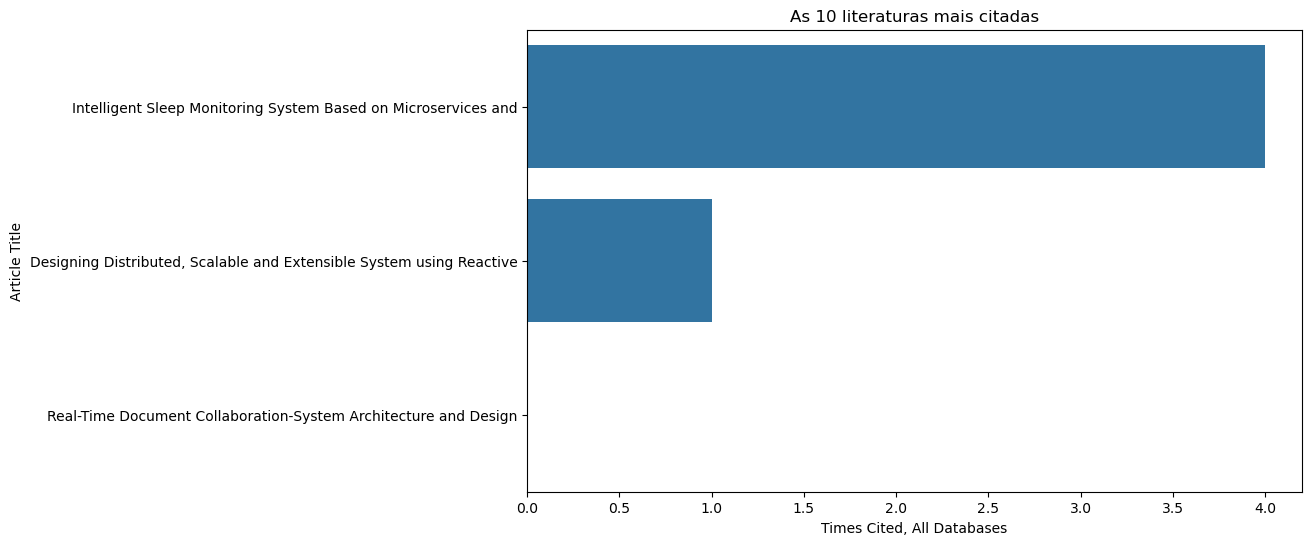

In [25]:
# 1. As 10 literaturas mais citadas

literature_data = df[['Article Title', 'Times Cited, All Databases']].sort_values('Times Cited, All Databases', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Times Cited, All Databases', y='Article Title', data=literature_data)
plt.title('As 10 literaturas mais citadas')
plt.show()


## RQ2: Quais periódicos são os mais populares no campo?

In [27]:

# RQ2: Quais são os periódicos mais populares (baseado no número de publicações)?
popular_journals = df['Source Title'].value_counts().head(10)
popular_journals


Source Title
IEEE ACCESS                                                           1
2019 22ND INTERNATIONAL CONFERENCE ON CONTROL SYSTEMS AND COMPUTER    1
APPLIED SCIENCES-BASEL                                                1
Name: count, dtype: int64

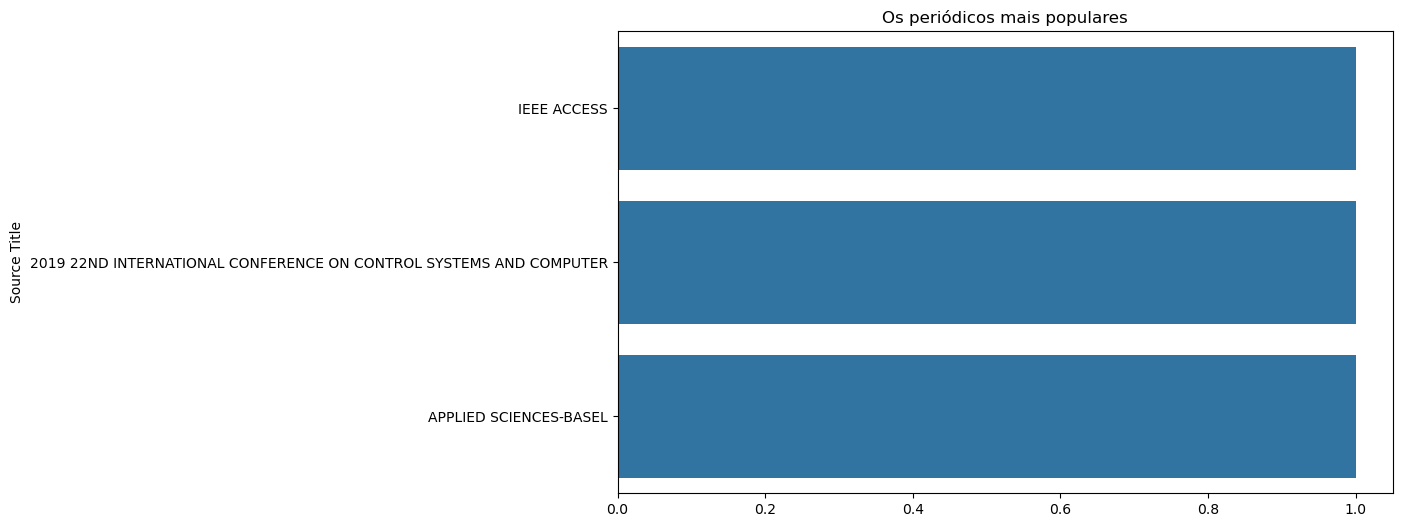

In [29]:
# 2. Os periódicos mais populares

journal_data = df['Source Title'].value_counts().head(7)
plt.figure(figsize=(10,6))
sns.barplot(x=journal_data.values, y=journal_data.index)
plt.title('Os periódicos mais populares')
plt.show() 

/var/folders/b1/pt4602l50jx0r8v1008yfkc40000gn/T/ipykernel_33679/1869139994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')


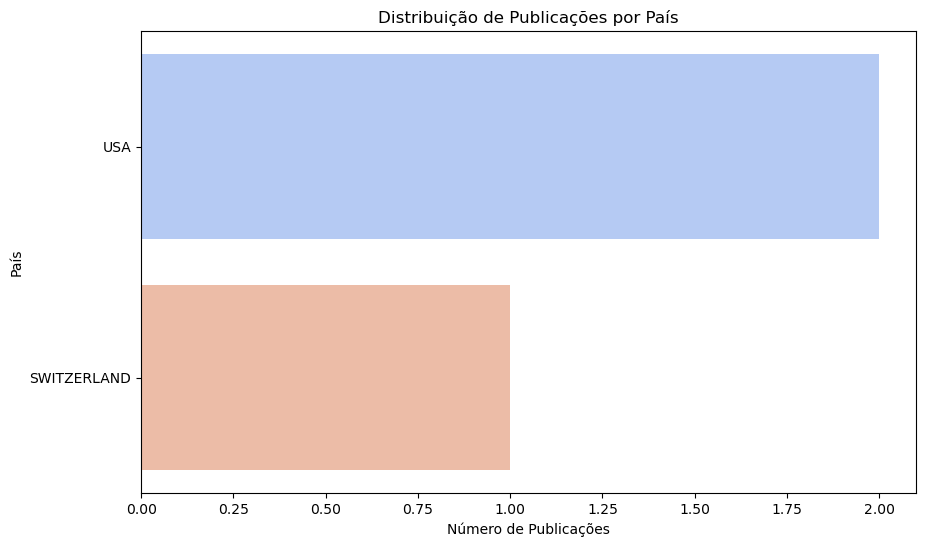

In [30]:

# Gráfico 2: Distribuição de Publicações por País
country_counts = df['Countries'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title("Distribuição de Publicações por País")
plt.xlabel("Número de Publicações")
plt.ylabel("País")
plt.show()
    

## RQ3: Quais autores estão liderando os estudos?

In [32]:
# RQ3: Autores com maior número de publicações
top_authors = df['Authors'].value_counts().head(10)
top_authors

Authors
Surantha, N        1
Tovarnitchi, VM    1
Iovescu, D         1
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            Author  Publication Count
0      Surantha, N                  1
1  Tovarnitchi, VM                  1
2       Iovescu, D                  1


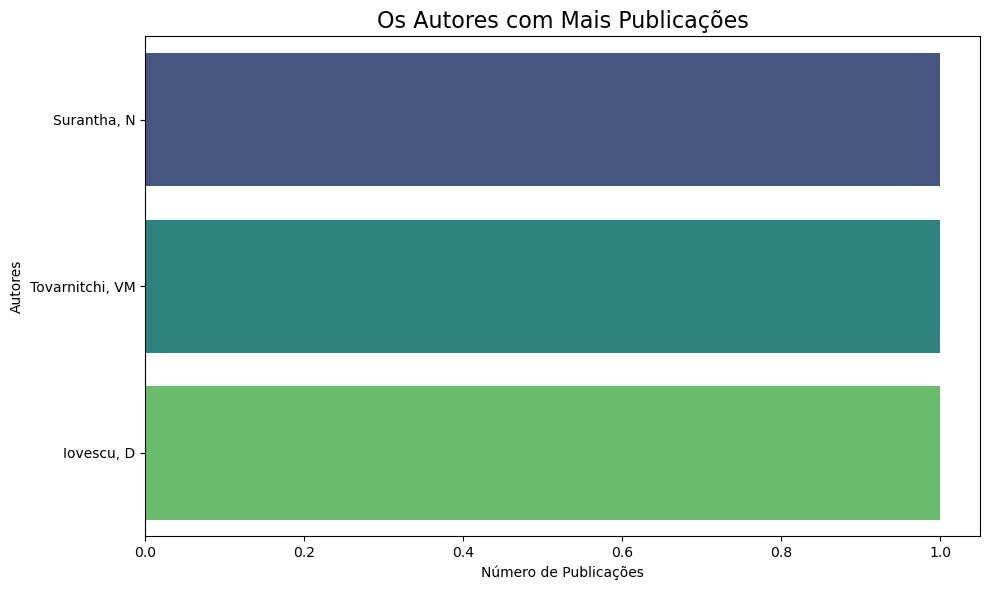

In [38]:
df_temp = df.copy()

df_temp['Authors'] = df_temp['Authors'].str.split('; ')
df_temp = df_temp.explode('Authors')

df_unique = df_temp.drop_duplicates(subset=['Authors', 'Article Title'])

author_data = df_unique['Authors'].value_counts().head(10)

author_df = author_data.reset_index()
author_df.columns = ['Author', 'Publication Count']

print(author_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Publication Count', y='Author', data=author_df, hue='Author', palette='viridis', dodge=False)
plt.title('Os Autores com Mais Publicações', fontsize=16)
plt.xlabel('Número de Publicações')
plt.ylabel('Autores')
plt.legend().set_visible(False) 
plt.tight_layout()
plt.show()

## RQ4: Qual é a evolução do campo de pesquisa?

<Axes: title={'center': 'Evolução do Campo de Pesquisa'}, xlabel='Ano', ylabel='Número de Publicações'>

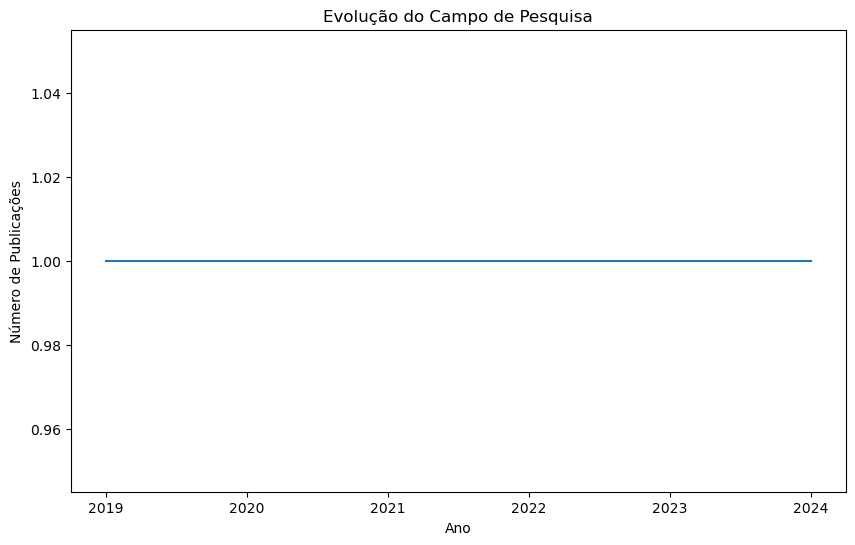

In [40]:
# RQ4: Evolução do campo ao longo do tempo (número de publicações por ano)
yearly_publications = df['Publication Year'].value_counts().sort_index()
yearly_publications.plot(kind='line', figsize=(10,6), title='Evolução do Campo de Pesquisa', ylabel='Número de Publicações', xlabel='Ano')

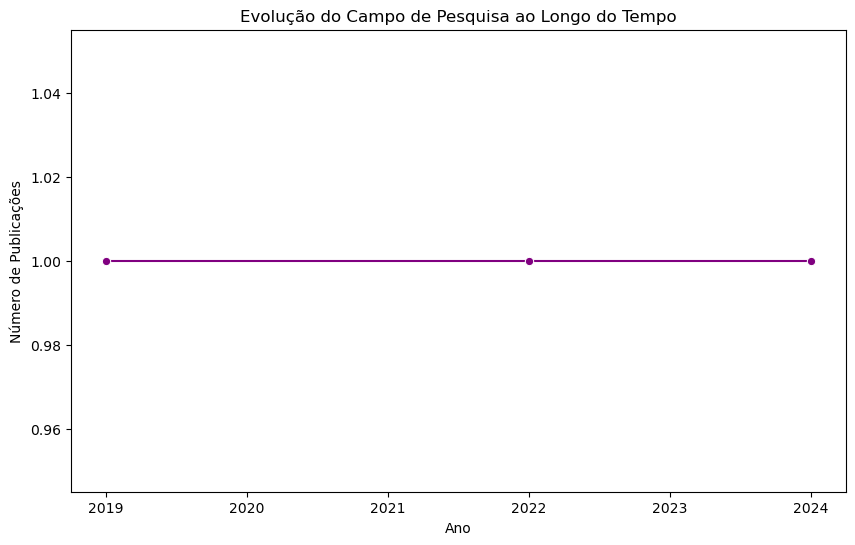

In [42]:
df['Publication Year'] = pd.to_numeric(df['Publication Year'], errors='coerce')
yearly_publications = df['Publication Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_publications.index, y=yearly_publications.values, marker="o", color='purple')
plt.title('Evolução do Campo de Pesquisa ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.show()    

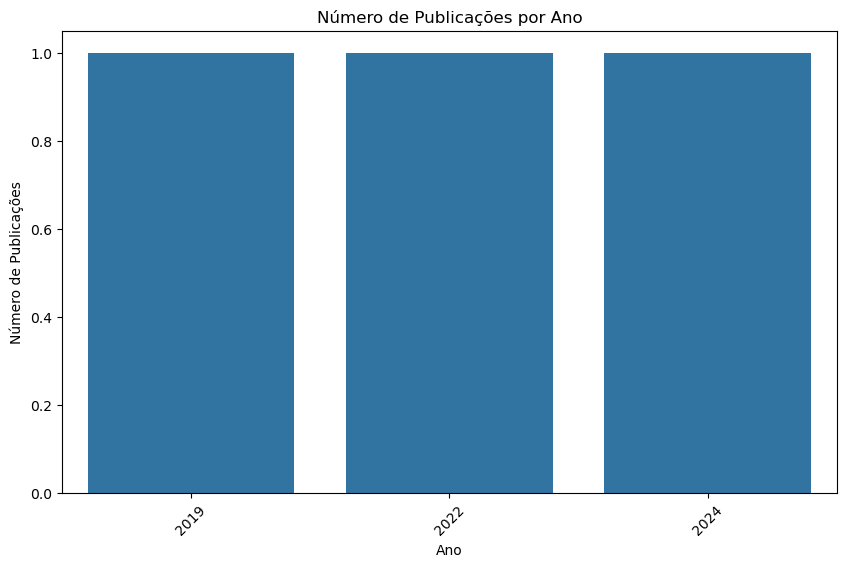

In [43]:
publicacoes_por_ano = df['Publication Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=publicacoes_por_ano.index, y=publicacoes_por_ano.values)
plt.title('Número de Publicações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.xticks(rotation=45)
plt.show()

## RQ5: Quais são as principais instituições de pesquisa?

In [91]:
# RQ5: Instituições mais frequentes nas publicações
top_institutions = df['Organizations-Enhanced'].value_counts().head(10)
top_institutions

KeyError: 'Organizations-Enhanced'

In [ ]:
dg

In [89]:
#RQ5: Quais são as principais instituições de pesquisa em EC-IoT?

top_institutions = df_temp[['Affiliations', 'Record Count']].nlargest(10, 'Record Count')
 
plt.figure(figsize=(10,6))
sns.barplot(x=top_institutions['Record Count'], y=top_institutions['Affiliations'])
plt.title('As principais instituições de pesquisa')
plt.xlabel('Record Count')
plt.ylabel('Affiliations')
plt.show()

KeyError: "None of [Index(['Affiliations', 'Record Count'], dtype='object')] are in the [index]"

## RQ6: Qual é o status da pesquisa em países/regiões?

In [48]:

# RQ6: Analisando a distribuição geográfica das publicações
countries_distribution = df['Countries'].value_counts().head(10)
countries_distribution


Countries
USA            2
SWITZERLAND    1
Name: count, dtype: int64

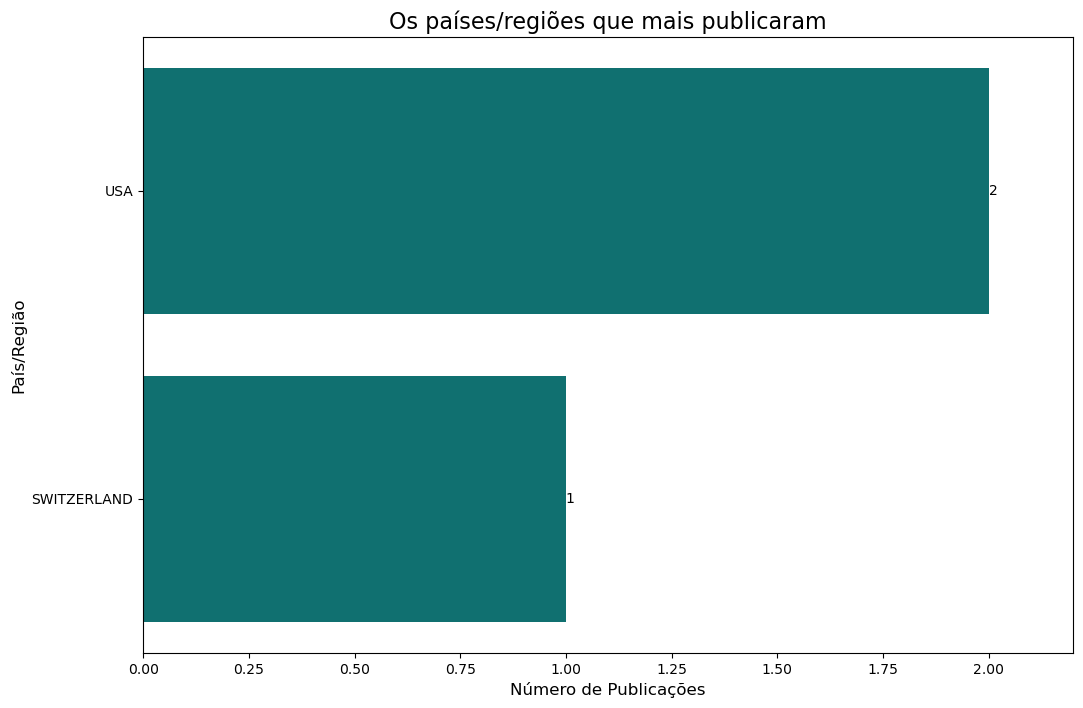

In [52]:
countries_distribution = df['Countries'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=countries_distribution.values, y=countries_distribution.index, color='teal')

plt.title('Os países/regiões que mais publicaram', fontsize=16)
plt.xlabel('Número de Publicações', fontsize=12)
plt.ylabel('País/Região', fontsize=12)

for index, value in enumerate(countries_distribution.values):
    plt.text(value, index, f'{value}', va='center')

plt.xlim(0, countries_distribution.max() * 1.1) 
plt.show()


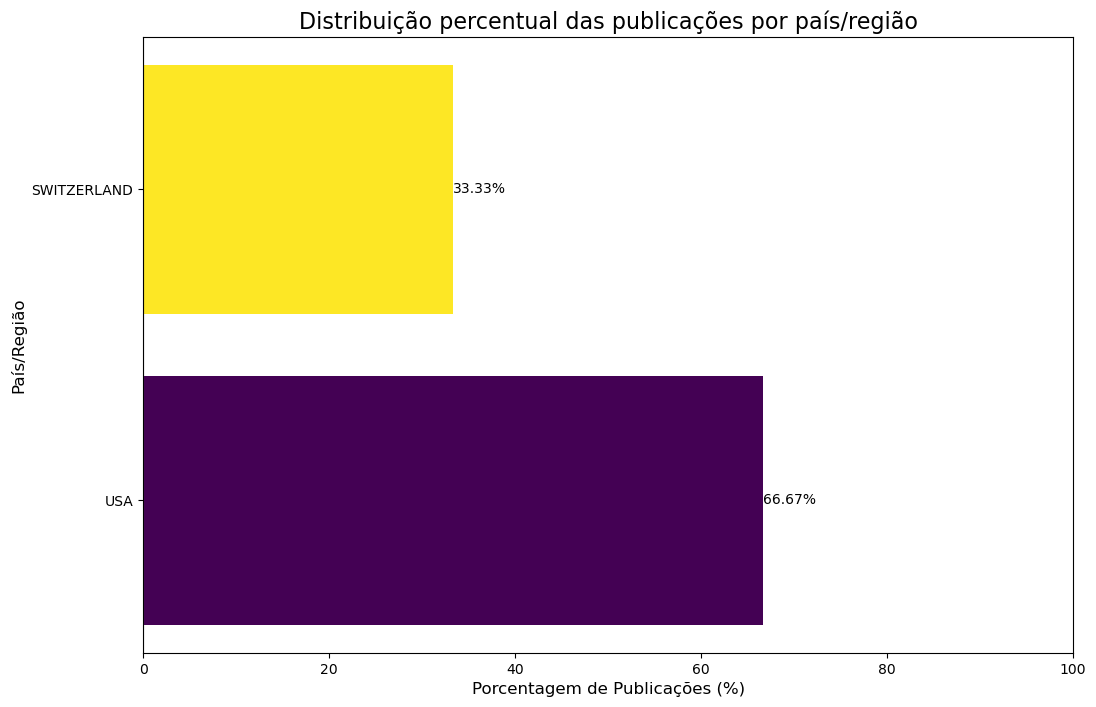

In [54]:
countries_data = df['Countries'].value_counts()

total_publications = countries_data.sum()

countries_percentage = (countries_data / total_publications) * 100

countries_percentage = countries_percentage[countries_percentage > 0.5]

countries_percentage = countries_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(countries_percentage)))
bars = plt.barh(countries_percentage.index, countries_percentage.values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')

plt.title('Distribuição percentual das publicações por país/região', fontsize=16)
plt.xlabel('Porcentagem de Publicações (%)', fontsize=12)
plt.ylabel('País/Região', fontsize=12)
plt.xlim(0, 100)  
plt.axvline(0, color='grey', linewidth=0.8) 
plt.show()


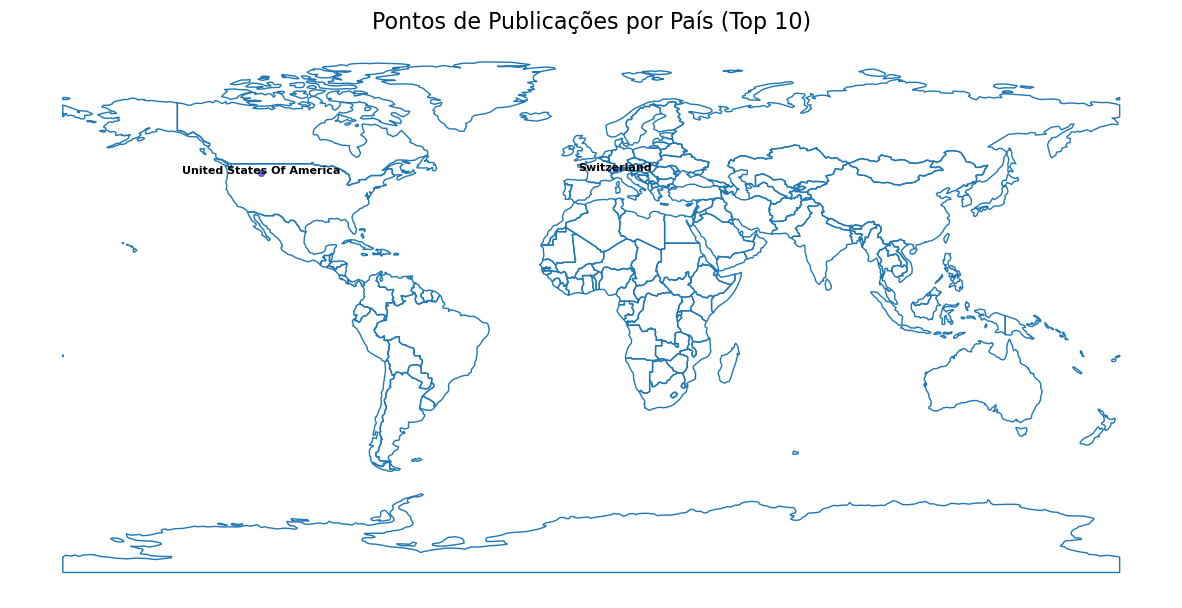

In [58]:
world = gpd.read_file('datasets/map/ne_110m_admin_0_countries.shp')

countries_data = df['Countries'].value_counts()

countries_df = pd.DataFrame(countries_data).reset_index()
countries_df.columns = ['Country', 'Publication Count']

countries_df['Country'] = countries_df['Country'].replace({
    'USA': 'United States Of America'  # Ajuste manual para garantir correspondência
})

top_countries_df = countries_df.nlargest(10, 'Publication Count')

world['ADMIN'] = world['ADMIN'].str.strip().str.title()

def get_best_match(country_name, choices):
    if not country_name:  
        return None
    match, score = process.extractOne(country_name, choices)
    return match if score >= 80 else None  

geo_countries = world['ADMIN'].unique()

top_countries_df['Country'] = top_countries_df['Country'].apply(lambda x: get_best_match(x, geo_countries))

top_countries_df = top_countries_df.dropna(subset=['Country'])

merged = world.merge(top_countries_df, how="left", left_on="ADMIN", right_on="Country")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1)

for idx, row in merged.iterrows():
    if pd.notna(row['Publication Count']):
        centroid = row['geometry'].centroid
        ax.scatter(centroid.x, centroid.y, 
                   s=row['Publication Count'] * 10, 
                   alpha=0.6, color='blue', edgecolor='k', linewidth=0.5)
        ax.annotate(text=row['Country'], 
                    xy=(centroid.x, centroid.y), 
                    ha='center', fontsize=8, color='black', weight='bold')

plt.title('Pontos de Publicações por País (Top 10)', fontsize=16)
plt.axis('off') 
plt.show()


## RQ7: Quais são as palavras-chave de pesquisa?

In [60]:

# RQ7: Palavras-chave mais comuns nas publicações
all_keywords = ','.join(df['Keywords'].dropna())
from collections import Counter
keyword_counts = Counter(all_keywords.split(','))
common_keywords = keyword_counts.most_common(10)
common_keywords


[('Monitoring; Sleep; Classification algorithms; Microservice', 1),
 ('Actor Model; Reactive Systems; Distributed Systems; System Architecture;',
  1),
 ('collaborative work; design document collaboration software; dependable', 1)]

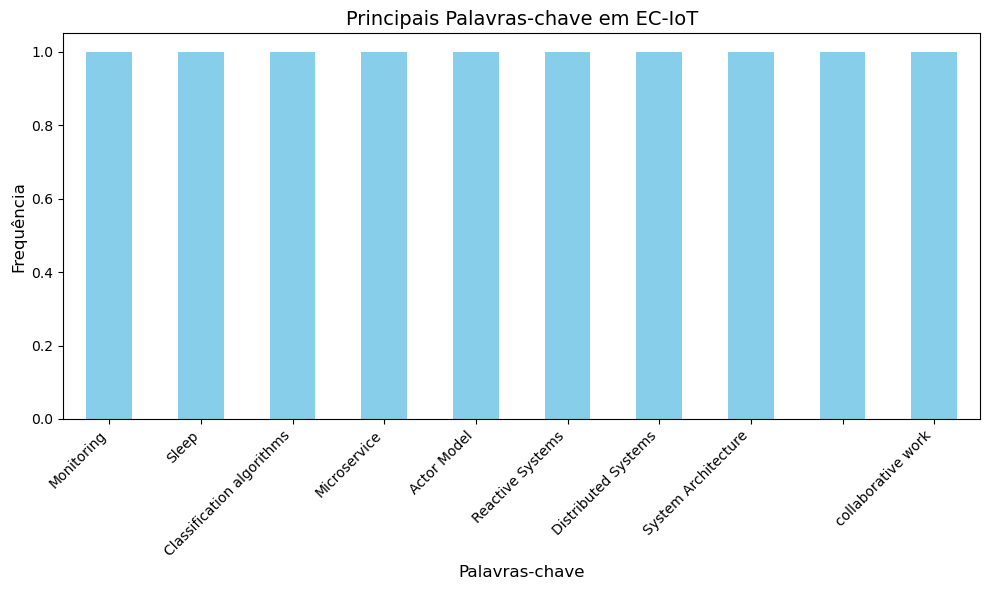

In [63]:
df_temp = df['Keywords'].dropna()

df_temp = df_temp.str.split(';')

df_keywords = df_temp.explode()

df_keywords = df_keywords.str.strip()

keyword_counts = df_keywords.value_counts()

top_keywords = keyword_counts.index.tolist()[:10] 

plt.figure(figsize=(10, 6))
keyword_counts.head(10).plot(kind='bar', color='skyblue')

plt.title('Principais Palavras-chave em EC-IoT', fontsize=14)
plt.xlabel('Palavras-chave', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


/var/folders/b1/pt4602l50jx0r8v1008yfkc40000gn/T/ipykernel_33679/1359300242.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_counts.head(10).values, y=keyword_counts.head(10).index, palette='viridis')


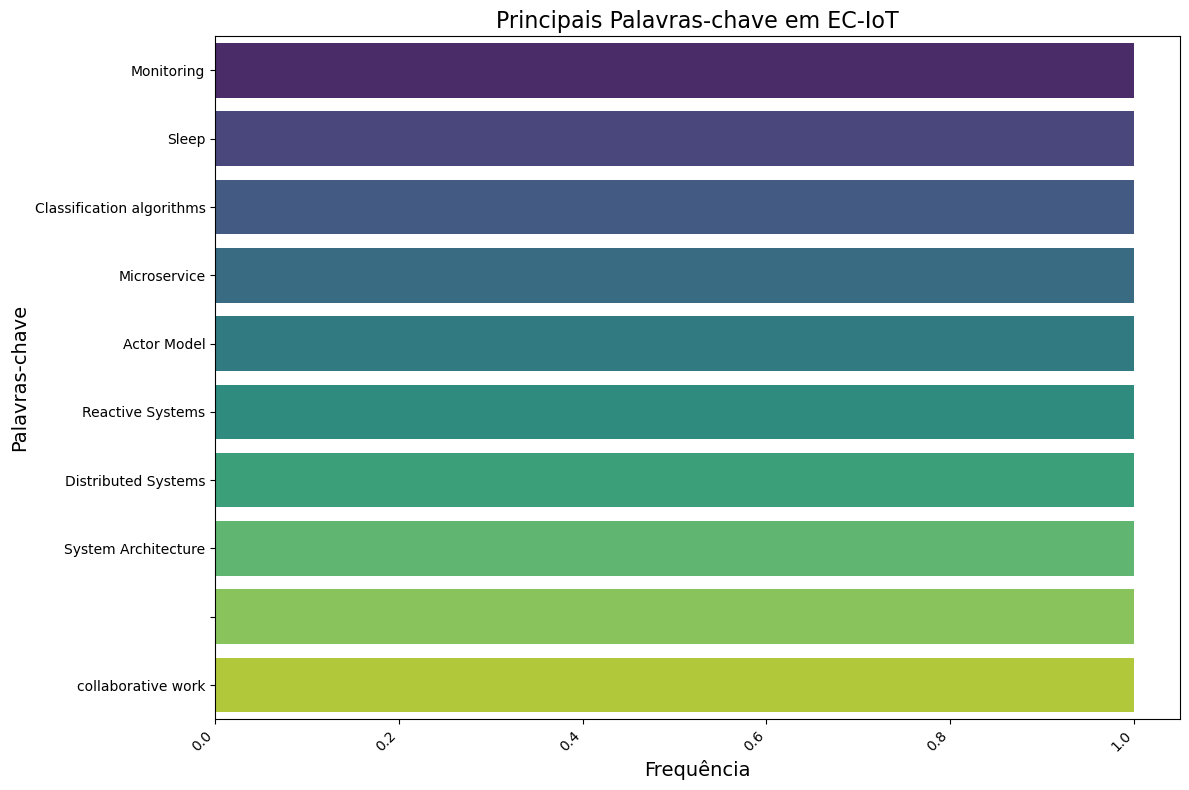

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = df['Keywords'].dropna()
df_temp = df_temp.str.split(';')

df_keywords = df_temp.explode()
df_keywords = df_keywords.str.strip()  

keyword_counts = df_keywords.value_counts()

top_keywords = keyword_counts.index.tolist()[:10] 

plt.figure(figsize=(12, 8))
sns.barplot(x=keyword_counts.head(10).values, y=keyword_counts.head(10).index, palette='viridis')

plt.title('Principais Palavras-chave', fontsize=16)
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Palavras-chave', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


## Análise Comparativa: Contribuição de pesquisadores brasileiros

In [66]:
brazil_researchers = df[df['Countries'].str.contains('Brazil', na=False)]
brazil_percentage = (brazil_researchers.shape[0] / df.shape[0]) * 100
print(f"Os pesquisadores brasileiros representam {brazil_percentage:.2f}% do total.")
brazil_researchers.head()


Os pesquisadores brasileiros representam 0.00% do total.


,Publication Type,Authors,Author Full Names,Article Title,Source Title,Document Type,Keywords,Organizations-Enhanced,Cited References,Number of References,...,End Page,DOI,UT (Unique WOS ID),Date of Export,Book Series Title,Conference Title,Conference Date,Conference Location,Host Institution,Countries


In [69]:
df['Cited References']

0              A. S. Foundation, 2013, AP JMETER GLOSS
1                                Agha G., 1986, THESIS
2    Al Qassem LM, 2023, IEEE ACCESS, V11, P2570, D...
Name: Cited References, dtype: object